## Load and prepare the data

In [4]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

RANDOM_STATE = 42

file_path = 'dataset/titanic.csv'
df = pd.read_csv(file_path)

label_encoder = LabelEncoder()

# Preparing the data
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1)
y = df['Survived']

num_imputer = SimpleImputer(strategy='mean')
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

# Impute categorical columns with the most frequent value (mode)
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

categorical_cols = ['Sex', 'Embarked']  # Add other categorical columns as needed

# Apply label encoder to each column
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col].astype(str))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## What the models would perform the best in this dataset?

In [7]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import classification_report

from sklearn.ensemble import AdaBoostClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.dummy import DummyClassifier

import xgboost as xgb

# List of models to evaluate
models = [
    ("AdaBoost", AdaBoostClassifier()),
    ("HistGradientBoosting", HistGradientBoostingClassifier()),
    ("RandomForest", RandomForestClassifier()),
    ("LogisticRegression", LogisticRegression(max_iter=1000)),
    ("KNeighbors", KNeighborsClassifier()),
    ("MLPClassifier", MLPClassifier(max_iter=1000)),
    ("SVC", SVC()),
    ("DecisionTree", DecisionTreeClassifier()),
    ("ExtraTree", ExtraTreeClassifier()),
    ("DummyClassifier", DummyClassifier(strategy='stratified')),
    ("XGBoost", xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
]

# DataFrame to store the results
results_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Evaluating each model
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    results_df = results_df.append({
        'Model': name,
        'Accuracy': report['accuracy'],
        'Precision': report['weighted avg']['precision'],
        'Recall': report['weighted avg']['recall'],
        'F1-Score': report['weighted avg']['f1-score']
    }, ignore_index=True)

# Sorting by different metrics
sorted_by_accuracy = results_df.sort_values('Accuracy', ascending=False)
sorted_by_precision = results_df.sort_values('Precision', ascending=False)
sorted_by_recall = results_df.sort_values('Recall', ascending=False)
sorted_by_f1 = results_df.sort_values('F1-Score', ascending=False)

# Displaying the sorted results
print("Sorted by Accuracy:\n", sorted_by_accuracy)
print("\nSorted by Precision:\n", sorted_by_precision)
print("\nSorted by Recall:\n", sorted_by_recall)
print("\nSorted by F1-Score:\n", sorted_by_f1)

Sorted by Accuracy:
                    Model  Accuracy  Precision    Recall  F1-Score
0               AdaBoost  1.000000   1.000000  1.000000  1.000000
1   HistGradientBoosting  1.000000   1.000000  1.000000  1.000000
2           RandomForest  1.000000   1.000000  1.000000  1.000000
3     LogisticRegression  1.000000   1.000000  1.000000  1.000000
5          MLPClassifier  1.000000   1.000000  1.000000  1.000000
7           DecisionTree  1.000000   1.000000  1.000000  1.000000
8              ExtraTree  1.000000   1.000000  1.000000  1.000000
10               XGBoost  1.000000   1.000000  1.000000  1.000000
6                    SVC  0.674603   0.625773  0.674603  0.591479
4             KNeighbors  0.658730   0.644415  0.658730  0.649553
9        DummyClassifier  0.603175   0.618282  0.603175  0.609444

Sorted by Precision:
                    Model  Accuracy  Precision    Recall  F1-Score
0               AdaBoost  1.000000   1.000000  1.000000  1.000000
1   HistGradientBoosting  1.0000

**Overall Best Performers**:

-   Almost all the models performs 100%, so we will adjust the models to be as little as possible

## Models for train
For my training, I chose **XGboost**, **Random Forest**, and the classic, well-known **Logistic Regression**

## **Logistic Regression**

### Train **LogisticRegression** with different hyperparameters

#### What `C` performs better?

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

C = [0.001, 0.01, 0.1, 1, 10, 100]

for c in C:
    log_reg_model = LogisticRegression(C=c, solver='liblinear', max_iter=1000)
    log_reg_model.fit(X_train, y_train)
    log_reg_predictions = log_reg_model.predict(X_test)

    # Evaluate the model
    print(f"Logistic Regression with C={c}")
    print(classification_report(y_test, log_reg_predictions))

Logistic Regression with C=0.001
              precision    recall  f1-score   support

           0       0.71      0.95      0.81        85
           1       0.67      0.20      0.30        41

    accuracy                           0.71       126
   macro avg       0.69      0.57      0.56       126
weighted avg       0.70      0.71      0.65       126

Logistic Regression with C=0.01
              precision    recall  f1-score   support

           0       0.72      0.98      0.83        85
           1       0.82      0.22      0.35        41

    accuracy                           0.73       126
   macro avg       0.77      0.60      0.59       126
weighted avg       0.75      0.73      0.67       126

Logistic Regression with C=0.1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.0

#### What solver performs better?

In [9]:
for solver in ['liblinear', 'saga']:
    log_reg_model = LogisticRegression(C=0.1, solver='liblinear', max_iter=1000)
    log_reg_model.fit(X_train, y_train)
    log_reg_predictions = log_reg_model.predict(X_test)

    # Evaluate the model
    print(f"Logistic Regression with solver: {solver}")
    print(classification_report(y_test, log_reg_predictions))

Logistic Regression with solver: liblinear
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

Logistic Regression with solver: saga
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



There seems to be no difference at all 🤷‍♂️

### Find the best parameters and get the best model with **GridSearchCV**

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Set up the hyperparameter grid
log_reg_params = {
    'C': [0.001, 0.01, 0.1, 1],
    'solver': ['liblinear', 'saga']
}

# Create the model instance
log_reg = LogisticRegression(max_iter=1000)

# Perform grid search
log_reg_cv = GridSearchCV(log_reg, log_reg_params, cv=5, scoring='f1')
log_reg_cv.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters for Logistic Regression:", log_reg_cv.best_params_)
print("Best score:", log_reg_cv.best_score_)

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}
Best score: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



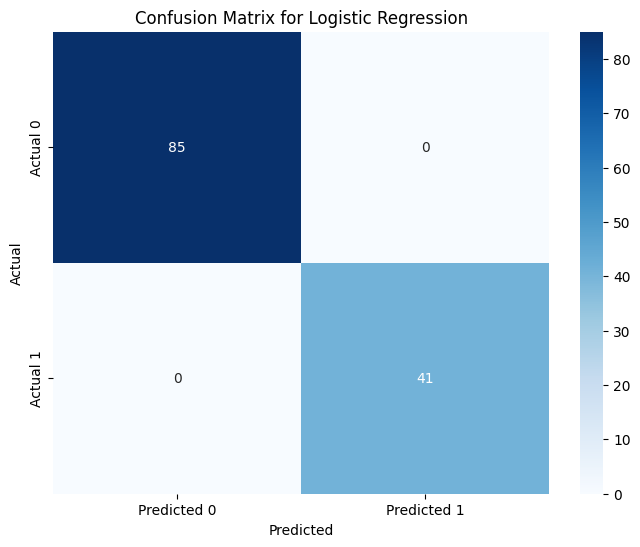

In [16]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

log_reg_predictions = log_reg_cv.best_estimator_.predict(X_test)

print(classification_report(y_test, log_reg_predictions))

cm = confusion_matrix(y_test, log_reg_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix for Logistic Regression')
plt.show()

### Save the best Logistic Regression model

In [17]:
import joblib

joblib.dump(log_reg_cv.best_estimator_, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

## **Random Forest**

### Train **RandomForest** with different hyperparameters

#### What numbers of estimators performs better?


In [19]:
from sklearn.ensemble import RandomForestClassifier

for n_estimators in [1, 2, 3, 5, 7, 10]:
    random_forest_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=20)
    random_forest_model.fit(X_train, y_train)
    rf_predictions = random_forest_model.predict(X_test)

    # Evaluate the model
    print(f"RandomForest Classification Report with n_estimators={n_estimators}")
    print(classification_report(y_test, rf_predictions))

RandomForest Classification Report with n_estimators=1
              precision    recall  f1-score   support

           0       0.99      0.96      0.98        85
           1       0.93      0.98      0.95        41

    accuracy                           0.97       126
   macro avg       0.96      0.97      0.96       126
weighted avg       0.97      0.97      0.97       126

RandomForest Classification Report with n_estimators=2
              precision    recall  f1-score   support

           0       0.91      1.00      0.96        85
           1       1.00      0.80      0.89        41

    accuracy                           0.94       126
   macro avg       0.96      0.90      0.92       126
weighted avg       0.94      0.94      0.93       126

RandomForest Classification Report with n_estimators=3
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        85
           1       1.00      0.93      0.96        41

    accuracy     

#### What max depth is more optimal?

In [23]:
from sklearn.ensemble import RandomForestClassifier

for max_depth in [2, 3, 5, 10, 20]:
    random_forest_model = RandomForestClassifier(n_estimators=5, max_depth=max_depth)
    random_forest_model.fit(X_train, y_train)
    rf_predictions = random_forest_model.predict(X_test)

    # Evaluate the model
    print(f"RandomForest Classification Report with max_depth={max_depth}")
    print(classification_report(y_test, rf_predictions))

RandomForest Classification Report with max_depth=2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

RandomForest Classification Report with max_depth=3
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        85
           1       0.98      1.00      0.99        41

    accuracy                           0.99       126
   macro avg       0.99      0.99      0.99       126
weighted avg       0.99      0.99      0.99       126

RandomForest Classification Report with max_depth=5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy              

#### What the `min_samples_split` is the best?

In [30]:
from sklearn.ensemble import RandomForestClassifier

for min_samples_split in [2, 3, 4, 5, 7, 10]:
    random_forest_model = RandomForestClassifier(n_estimators=5, max_depth=5, min_samples_split=min_samples_split)
    random_forest_model.fit(X_train, y_train)
    rf_predictions = random_forest_model.predict(X_test)

    # Evaluate the model
    print(f"RandomForest Classification Report with min_samples_split={min_samples_split}")
    print(classification_report(y_test, rf_predictions))

RandomForest Classification Report with min_samples_split=2
              precision    recall  f1-score   support

           0       0.99      0.98      0.98        85
           1       0.95      0.98      0.96        41

    accuracy                           0.98       126
   macro avg       0.97      0.98      0.97       126
weighted avg       0.98      0.98      0.98       126

RandomForest Classification Report with min_samples_split=3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

RandomForest Classification Report with min_samples_split=4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

  

### Find the best parameters and get the best model with **GridSearchCV**

Best parameters for RandomForest: {'max_depth': 5, 'min_samples_split': 3, 'n_estimators': 7}
Best score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



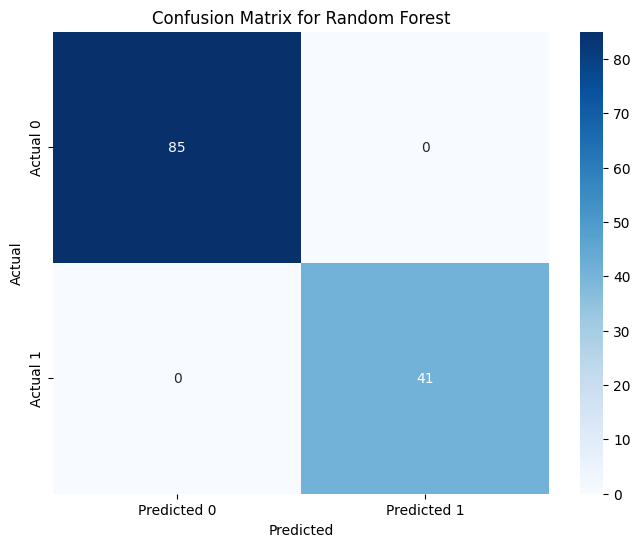

In [31]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Hyperparameter grid
rf_params = {
    'n_estimators': [5, 7, 10],
    'max_depth': [5, 7, 10, 15],
    'min_samples_split': [3, 4, 5, 7, 10]
}

# Model instance
random_forest = RandomForestClassifier()

# Grid search
rf_cv = GridSearchCV(random_forest, rf_params, cv=5, scoring='f1')
rf_cv.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for RandomForest:", rf_cv.best_params_)
print("Best score:", rf_cv.best_score_)

rf_predictions = rf_cv.best_estimator_.predict(X_test)

print(classification_report(y_test, rf_predictions))

cm = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix for Random Forest')
plt.show()

### Save the best **Random Forest** model

In [32]:
import joblib

joblib.dump(rf_cv.best_estimator_, 'random_forest_model.pkl')

['random_forest_model.pkl']

## **XGBoost**

### Train **XGBoost** with different hyperparameters

#### What the numbers of estimators performs better?

In [34]:
for n_estimators in [1, 2, 3, 5, 7, 10]:
    # Create XGBoost model with specified hyperparameters
    xgboost_model = xgb.XGBClassifier(n_estimators=n_estimators)
    xgboost_model.fit(X_train, y_train)
    xgb_predictions = xgboost_model.predict(X_test)

    # Evaluate the model
    print(f"XGBoost Classification Report with n_estimators={n_estimators}")
    print(classification_report(y_test, xgb_predictions))

XGBoost Classification Report with n_estimators=1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

XGBoost Classification Report with n_estimators=2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

XGBoost Classification Report with n_estimators=3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                    

#### What max depth is more optimal?

In [35]:
for max_depth in [1, 2, 3, 5, 7, 10, 20]:
    # Create XGBoost model with specified hyperparameters
    xgboost_model = xgb.XGBClassifier(n_estimators=1, max_depth=max_depth)
    xgboost_model.fit(X_train, y_train)
    xgb_predictions = xgboost_model.predict(X_test)

    # Evaluate the model
    print(f"XGBoost Classification Report with max_depth={max_depth}")
    print(classification_report(y_test, xgb_predictions))

XGBoost Classification Report with max_depth=1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

XGBoost Classification Report with max_depth=2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126

XGBoost Classification Report with max_depth=3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.

#### What the learning rate is the best?

In [36]:
for learning_rate in [0.001, 0.01, 0.03, 0.1, 0.3, 1]:
    # Create XGBoost model with specified hyperparameters
    xgboost_model = xgb.XGBClassifier(n_estimators=1, max_depth=1, learning_rate=learning_rate)
    xgboost_model.fit(X_train, y_train)
    xgb_predictions = xgboost_model.predict(X_test)

    # Evaluate the model
    print(f"XGBoost Classification Report with learning_rate={learning_rate}")
    print(classification_report(y_test, xgb_predictions))

XGBoost Classification Report with learning_rate=0.001
              precision    recall  f1-score   support

           0       0.67      1.00      0.81        85
           1       0.00      0.00      0.00        41

    accuracy                           0.67       126
   macro avg       0.34      0.50      0.40       126
weighted avg       0.46      0.67      0.54       126

XGBoost Classification Report with learning_rate=0.01
              precision    recall  f1-score   support

           0       0.67      1.00      0.81        85
           1       0.00      0.00      0.00        41

    accuracy                           0.67       126
   macro avg       0.34      0.50      0.40       126
weighted avg       0.46      0.67      0.54       126

XGBoost Classification Report with learning_rate=0.03
              precision    recall  f1-score   support

           0       0.67      1.00      0.81        85
           1       0.00      0.00      0.00        41

    accuracy       

### Find the best parameters and get the best model with **GridSearchCV**

Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 1, 'n_estimators': 1}
Best score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        85
           1       1.00      1.00      1.00        41

    accuracy                           1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



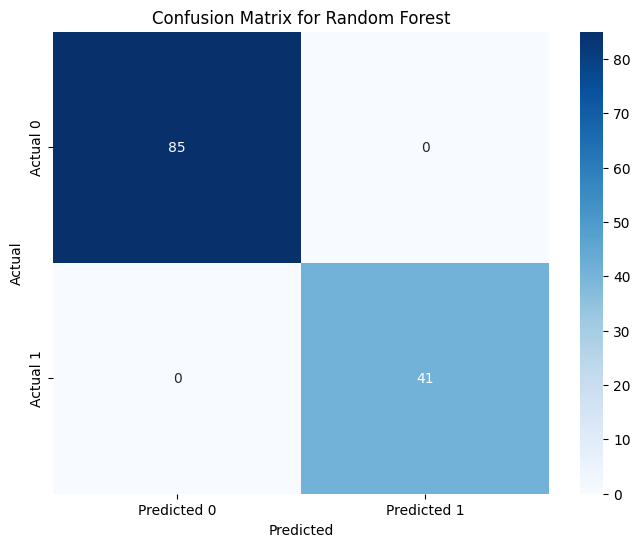

In [37]:
import xgboost as xgb

# Hyperparameter grid
xgb_params = {
    'n_estimators': [1, 2, 3],
    'learning_rate': [0.3, 0.5, 0.7, 1.0],
    'max_depth': [1, 2, 3]
}

# Model instance
xgboost = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Grid search
xgb_cv = GridSearchCV(xgboost, xgb_params, cv=5, scoring='f1')
xgb_cv.fit(X_train, y_train)

# Best parameters and score
print("Best parameters for XGBoost:", xgb_cv.best_params_)
print("Best score:", xgb_cv.best_score_)

xgb_predictions = xgb_cv.best_estimator_.predict(X_test)

print(classification_report(y_test, xgb_predictions))

cm = confusion_matrix(y_test, xgb_predictions)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title(f'Confusion Matrix for Random Forest')
plt.show()

### Save the best **XGBoost** model

In [38]:
xgb_cv.best_estimator_.save_model('xgboost_model.bin')